<a href="https://colab.research.google.com/github/park-jiha/deep-learning/blob/main/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀**
## 기존의 선형 함수와 MSE를 그대로 이용할 수 있을까?

### 가설 함수
$$ y =ax +b $$
왜안되나? -> 시그모이드 사용

### 오차함수
MSE -> 왜 안되나?(극소점에 빠짐 nonconvex) -> binary cross entropy

###시그모이드 함수 -> 가설 함수
$$ y = \frac{1}{1+e^{-(ax+b)}} $$
###오차함수
$$ cost(W) = -\frac{1}{n} \sum y \log\left(H(x)\right) + (1-y) \left( \log(1-H(x) \right) $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 설정

data = [[2,False],[4,False],[6,False],[8,True],[10,True],[12,True],[14,True]] # 시험시간 , 합격 여부(True/합,False/불합)
x_data = [i[0] for i in data]
y_data = [i[1] for i in data]
x_data,y_data

([2, 4, 6, 8, 10, 12, 14], [False, False, False, True, True, True, True])

## True,False 는 Boolean 형
true false 말고도 문자열 데이터도 존재 하기도 함

-> 컴퓨터가 알아먹을수 있게 숫자로 바꿔줘야함 => 데이터 인코딩

In [ ]:
y_data = list(map(int,y_data))
y_data

[0, 0, 0, 1, 1, 1, 1]

### 좌표평면에 점 찍어보기

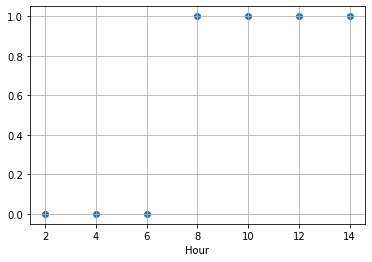

In [ ]:
plt.scatter(x_data,y_data)
plt.xlabel('Hour')
plt.grid(True)

### 학습 단계

In [ ]:
# 시그모이드 함수 
def sigmoid(x):
  return 1/(1+np.e**(-x))

# 오차함수를 각각 a,b로 편 미분 
a = 0
b = 0
# a,b 초기화
epochs = 2001
lr = 0.05

In [ ]:
for i in range(epochs):
  for x,y in data:
    # 미분값
    a_diff = x*(sigmoid(a*x+b)-int(y))
    b_diff = sigmoid(a*x+b)-int(y)
    #갱신
    a-= lr*a_diff
    b-= lr*b_diff

  if i%100==0:
    print("epoch:.%f, a:%.4f , b:%.4f"%(i,a,b))

epoch:.0.000000, a:0.2860 , b:-0.0029
epoch:.100.000000, a:0.6458 , b:-3.2469
epoch:.200.000000, a:0.8366 , b:-4.8272
epoch:.300.000000, a:0.9717 , b:-5.9082
epoch:.400.000000, a:1.0791 , b:-6.7520
epoch:.500.000000, a:1.1698 , b:-7.4548
epoch:.600.000000, a:1.2491 , b:-8.0630
epoch:.700.000000, a:1.3200 , b:-8.6023
epoch:.800.000000, a:1.3844 , b:-9.0889
epoch:.900.000000, a:1.4436 , b:-9.5336
epoch:.1000.000000, a:1.4985 , b:-9.9440
epoch:.1100.000000, a:1.5497 , b:-10.3257
epoch:.1200.000000, a:1.5978 , b:-10.6829
epoch:.1300.000000, a:1.6432 , b:-11.0189
epoch:.1400.000000, a:1.6863 , b:-11.3365
epoch:.1500.000000, a:1.7272 , b:-11.6376
epoch:.1600.000000, a:1.7662 , b:-11.9242
epoch:.1700.000000, a:1.8036 , b:-12.1977
epoch:.1800.000000, a:1.8394 , b:-12.4594
epoch:.1900.000000, a:1.8737 , b:-12.7102
epoch:.2000.000000, a:1.9068 , b:-12.9513


## **결과 확인(시그모이드 함수 꼴 확인)**

[0, 0, 0, 1, 1, 1, 1]

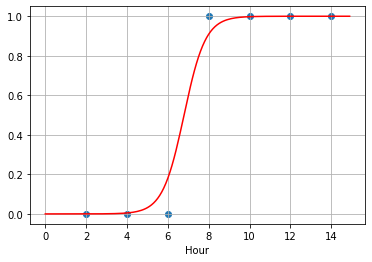

In [ ]:
plt.scatter(x_data,y_data)
plt.xlabel('Hour')

x_range=(np.arange(0,15,0.1))
plt.plot(x_range,np.array([sigmoid(a*x+b) for x in x_range]),'r')
plt.grid(True)
y_data

#### ex) 3시간 공부했을 경우 합/불 ?

In [ ]:
print((sigmoid(a*3+b))>0.5) # 0.5 를 기준

False


# **Tensorflow 사용**

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]

x1 = [i[0] for i in data]
y = [i[1] for i in data]

x_g=[i[0] for i in data]
y_g=[i[1] for i in data]

### 그래프로 확인(좌표평면 점 찍기)

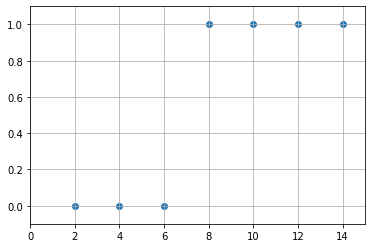

In [17]:
plt.scatter(x1, y)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
plt.grid(True)

In [18]:
x1_data = np.array(x1)
y_data = np.array(y)

#a = tf.Variable(random.random())
#b = tf.Variable(random.random())

a = tf.Variable(0, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

def compute_loss():
    hypothesis = tf.math.sigmoid(a*x1_data+b)
    loss = -tf.math.reduce_mean(y_data * tf.math.log(hypothesis) 
                                + (1 - y_data) * tf.math.log(1-hypothesis))
    return loss

### 학습 단계

In [19]:
optimizer = tf.optimizers.SGD(lr=0.05)
epoch = 15001

for i in range(epoch):
    optimizer.minimize(compute_loss, var_list=[a,b])
    if i%1000 == 0:
        print(i,'a:', a.numpy(), 'b:', b.numpy(), 'loss:', compute_loss().numpy())

0 a: 0.11428572 b: 0.0035714281 loss: 0.55463773
1000 a: 0.6151288 b: -3.913399 loss: 0.18809369
2000 a: 0.831343 b: -5.517361 loss: 0.13457473
3000 a: 0.98071706 b: -6.602697 loss: 0.11040014
4000 a: 1.0987628 b: -7.4521227 loss: 0.095641874
5000 a: 1.1981717 b: -8.163361 loss: 0.08530726
6000 a: 1.2850072 b: -8.782278 loss: 0.0774856
7000 a: 1.362669 b: -9.334306 loss: 0.07126483
8000 a: 1.4332715 b: -9.835133 loss: 0.0661453
9000 a: 1.498228 b: -10.295178 loss: 0.061825875
10000 a: 1.5585368 b: -10.721764 loss: 0.058112152
11000 a: 1.6149315 b: -11.120253 loss: 0.054871555
12000 a: 1.6679708 b: -11.494706 loss: 0.052010175
13000 a: 1.7180914 b: -11.848302 loss: 0.049458694
14000 a: 1.7656425 b: -12.183561 loss: 0.047165
15000 a: 1.8109087 b: -12.502541 loss: 0.045088697


### 그래프로 확인(시그모이드 함수 꼴)

기울기=1.8109, 절편=-12.5025


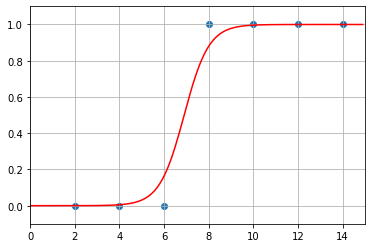

In [20]:
# 앞서 구한 기울기와 절편을 이용해 그래프를 그려 봅니다.
plt.scatter(x_g, y_g)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) #그래프로 나타낼 x값의 범위를 정합니다.
plt.plot(np.arange(0, 15, 0.1), np.array([tf.math.sigmoid(a*x + b) for x in x_range]),'-r')
plt.grid(True)
plt.show
print("기울기=%.04f, 절편=%.04f" % (a.numpy(), b.numpy()))